In [1]:
%pylab inline
from wallet.util.analysis import Analysis
symbols = ['SCHX','SCHG','SCHV','SCHA','SCHF','SCHE',
           'MCHI','GXC','CNYA','ASHR','VGLT','SCHP','TVIX']

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
ana = Analysis(symbols, 21, 5)
print(ana)
ana.screen()

from 2020-04-30 to 2020-06-05 - 13 symbols


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
SCHG,21.0,0.450140,0.349957,-0.216085,-0.144568,0.542726,1.019148,1.074227,1.263594,10.519979,3.356699,-0.105076
SCHF,21.0,0.561692,0.523212,-0.558208,-0.241794,0.608961,1.351162,1.412033,1.058376,13.041894,2.792893,-0.380947
SCHX,21.0,0.439067,0.420415,-0.454362,-0.197663,0.601363,1.027017,1.102610,1.025486,10.579563,3.850010,-0.629014
SCHE,21.0,0.502317,0.586914,-0.423690,-0.294388,0.344796,1.539238,1.585651,0.842339,11.642599,3.384477,0.474539
SCHA,21.0,0.674016,0.830680,-1.130449,-0.630159,0.849740,1.820070,1.828512,0.801848,16.646906,7.493369,-0.492561
SCHV,21.0,0.424066,0.598103,-0.770525,-0.655669,0.621659,1.165463,1.442476,0.695750,10.484531,5.863187,-0.521327
GXC,21.0,0.410570,0.753085,-1.104643,-0.797895,0.490397,1.339762,1.498472,0.534646,8.573516,5.665438,-0.460209
MCHI,21.0,0.388869,0.787943,-1.203944,-0.915122,0.562828,1.409359,1.522494,0.483452,7.869285,6.058193,-0.517758
CNYA,21.0,0.295178,0.674707,-0.816835,-0.653324,0.198391,1.210329,1.471076,0.425728,6.090304,4.243854,0.021815


In [3]:
ana.data.rolling(5).mean().pct_change().corr().loc['SCHG'].sort_values()

Symbols
TVIX   -0.806961
VGLT   -0.650611
SCHP    0.041127
MCHI    0.341220
GXC     0.351687
CNYA    0.390779
ASHR    0.405757
SCHE    0.454953
SCHF    0.632402
SCHV    0.668042
SCHA    0.816443
SCHX    0.887723
SCHG    1.000000
Name: SCHG, dtype: float64

In [4]:
ana.setup_mask(['SCHG','SCHA','SCHF','SCHE','CNYA','VGLT','SCHP'])
ana.optimize_iteration([100], min_percent=.1)

([(0.4257, {'CNYA': 1}),
  (0.4573, {'CNYA': 0.1978, 'SCHP': 0.8022}),
  (0.8364, {'SCHA': 0.2072, 'SCHP': 0.7928}),
  (1.0745, {'VGLT': 0.2803, 'SCHF': 0.6065, 'SCHE': 0.1132}),
  (1.3241, {'SCHG': 0.333, 'SCHF': 0.1484, 'SCHP': 0.5185}),
  (1.3722, {'VGLT': 0.3281, 'SCHG': 0.4651, 'SCHF': 0.2067}),
  (1.4087, {'SCHF': 0.1124, 'SCHG': 0.4131, 'VGLT': 0.3723, 'SCHE': 0.1022})],
 [(0, 0, [[{'SCHF': 11, 'SCHG': 41, 'VGLT': 37, 'SCHE': 10}, set()]])])

2020-06-01 rebalance: buy CNYA,VGLT,SCHP, sell SCHG,SCHA,SCHF,SCHE


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio,21.0,0.234472,0.171766,-0.123832,-0.053933,0.285563,0.483076,0.556977,1.318856,4.786725,1.490264,-0.257024
Portfolio-RB,21.0,0.231564,0.170947,-0.123832,-0.053933,0.271672,0.483076,0.556977,1.308163,4.643495,1.490264,-0.217474
SCHG,21.0,0.450140,0.349957,-0.216085,-0.144568,0.542726,1.019148,1.074227,1.263594,10.519979,3.356699,-0.105076
SCHF,21.0,0.561692,0.523212,-0.558208,-0.241794,0.608961,1.351162,1.412033,1.058376,13.041894,2.792893,-0.380947
SCHE,21.0,0.502317,0.586914,-0.423690,-0.294388,0.344796,1.539238,1.585651,0.842339,11.642599,3.384477,0.474539
SCHA,21.0,0.674016,0.830680,-1.130449,-0.630159,0.849740,1.820070,1.828512,0.801848,16.646906,7.493369,-0.492561
CNYA,21.0,0.295178,0.674707,-0.816835,-0.653324,0.198391,1.210329,1.471076,0.425728,6.090304,4.243854,0.021815
SCHP,21.0,0.012102,0.061563,-0.148259,-0.131605,0.030355,0.071102,0.091207,0.067656,-0.169288,0.941495,-1.381018
VGLT,21.0,-0.184755,0.275288,-0.865921,-0.591937,-0.153960,0.241339,0.296157,-0.699962,-5.918077,6.584251,-0.543670


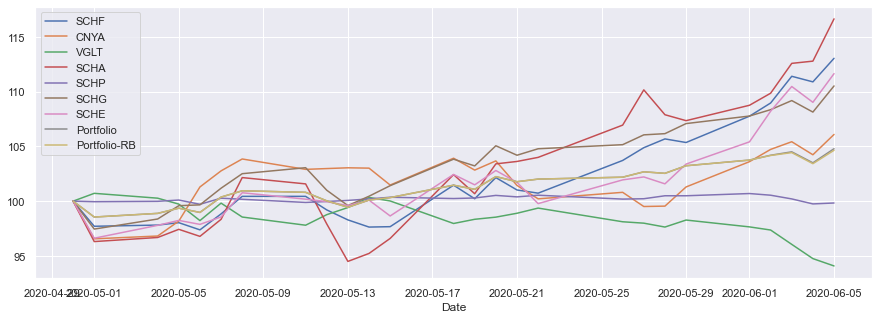

In [5]:
ana.graph({'SCHG':40,'SCHA':5,'SCHF':5,'SCHE':5,'CNYA':5,'VGLT':30,'SCHP':10})

In [ ]:
########################################

In [6]:
ana = Analysis(symbols, 126, 5)
print(ana)
ana.screen()

from 2019-11-27 to 2020-06-05 - 13 symbols


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
VGLT,126.0,0.110509,0.563799,-1.506081,-0.582338,0.076026,0.944647,2.240844,0.181931,12.046273,14.205461,0.627833
TVIX,126.0,0.754601,7.378201,-14.867118,-7.091679,-1.015409,17.765760,24.942981,0.101199,79.635757,86.544471,1.462762
SCHG,126.0,0.087667,1.051547,-3.578393,-2.405134,0.280342,1.431619,3.087517,0.075822,11.456908,32.392022,-1.155638
SCHP,126.0,0.037780,0.396289,-1.543209,-0.670254,0.047142,0.407875,1.716754,0.075307,4.355380,10.848025,-0.278687
GXC,126.0,0.061508,0.863004,-2.712755,-1.344226,0.299401,1.181400,2.063775,0.062075,7.619874,22.841330,-0.969239
MCHI,126.0,0.061586,0.880963,-2.660123,-1.269993,0.278437,1.168975,2.235831,0.060898,7.371767,22.750071,-0.855002
CNYA,126.0,0.053847,0.815173,-2.557268,-1.760159,0.270538,1.017290,1.561731,0.056321,6.537267,17.379003,-1.186049
ASHR,126.0,0.028090,0.840027,-3.009172,-1.689324,0.228267,0.993161,1.504266,0.023991,2.684032,20.174870,-1.340596
SCHX,126.0,0.013304,1.062871,-3.866662,-2.440880,0.205295,1.369222,3.187331,0.005050,2.635356,34.332964,-1.033571


In [7]:
ana.data.rolling(5).mean().pct_change().corr().loc['SCHG'].sort_values()

Symbols
TVIX   -0.853387
VGLT   -0.010782
SCHP    0.488556
CNYA    0.607098
ASHR    0.611431
GXC     0.772209
MCHI    0.778136
SCHE    0.900093
SCHF    0.931801
SCHA    0.935119
SCHV    0.945766
SCHX    0.988237
SCHG    1.000000
Name: SCHG, dtype: float64

In [8]:
ana.setup_mask(['SCHG','SCHA','SCHF','SCHE','CNYA','VGLT','SCHP'])
ana.optimize_iteration([100], min_percent=.1)

/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/scipy/optimize/optimize.py:1816: RuntimeWarning: invalid value encountered in double_scalars
  p = (xf - fulc) * q - (xf - nfc) * r
/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/scipy/optimize/optimize.py:1817: RuntimeWarning: invalid value encountered in double_scalars
  q = 2.0 * (q - r)


([(-0.0509, {'SCHF': 1}),
  (-0.049, {'SCHE': 1}),
  (0.0753, {'SCHP': 1}),
  (0.082, {'CNYA': 0.2101, 'SCHP': 0.7899}),
  (0.0876, {'SCHG': 0.2574, 'SCHP': 0.7426}),
  (0.1884, {'VGLT': 0.8308, 'CNYA': 0.1692}),
  (0.1979, {'SCHG': 0.1867, 'VGLT': 0.8133})],
 [(0, 0, [[{'SCHG': 19, 'VGLT': 81}, set()]])])

2020-01-13 rebalance: buy SCHA,VGLT,SCHP,TVIX, sell SCHG,SCHF,SCHE,CNYA
2020-01-31 rebalance: buy SCHG,SCHA,SCHF,SCHE,CNYA, sell VGLT,SCHP,TVIX
2020-02-14 rebalance: buy VGLT,SCHP,TVIX, sell SCHG,SCHA,SCHF,SCHE,CNYA
2020-03-02 rebalance: buy SCHG,SCHA,SCHF,SCHE, sell CNYA,VGLT,SCHP,TVIX
2020-03-16 rebalance: buy SCHG,SCHA,SCHF,SCHE,CNYA,SCHP, sell VGLT,TVIX
2020-03-30 rebalance: buy CNYA,VGLT,SCHP,TVIX, sell SCHG,SCHA,SCHF,SCHE
2020-04-14 rebalance: buy VGLT,SCHP,TVIX, sell SCHG,SCHA,SCHF,SCHE,CNYA
2020-05-18 rebalance: buy SCHF,VGLT,SCHP,TVIX, sell SCHG,SCHA,SCHE,CNYA
2020-06-03 rebalance: buy CNYA,VGLT,SCHP,TVIX, sell SCHG,SCHA,SCHF,SCHE


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio-RB,126.0,0.164122,0.390749,-1.131857,-0.418438,0.144774,0.800961,1.729622,0.399709,22.526126,6.876875,0.898132
Portfolio,126.0,0.078408,0.349870,-1.329511,-0.516651,0.115754,0.532331,1.299462,0.201421,9.571375,8.956233,-0.796533


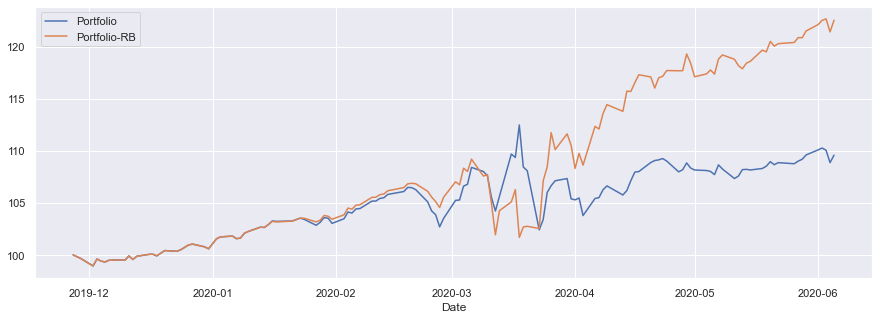

In [9]:
ana.graph({'SCHG':40,'SCHA':5,'SCHF':5,'SCHE':5,'CNYA':5,'VGLT':30,'SCHP':10,'TVIX':2}, drop_components=True)